**📌 1. 라이브러리 불러오기**

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Keras / TensorFlow
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# 모델 평가용 (추가)
from sklearn.metrics import r2_score


**📌 2. 데이터 로드 및 확인**

In [27]:
url = "https://raw.githubusercontent.com/MyungKyuYi/AI-class/refs/heads/main/kc_house_data.csv"
df = pd.read_csv(url)

print("데이터 크기:", df.shape)
df.head()

데이터 크기: (21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


**📌 3. 상관관계 분석 (Heatmap)**

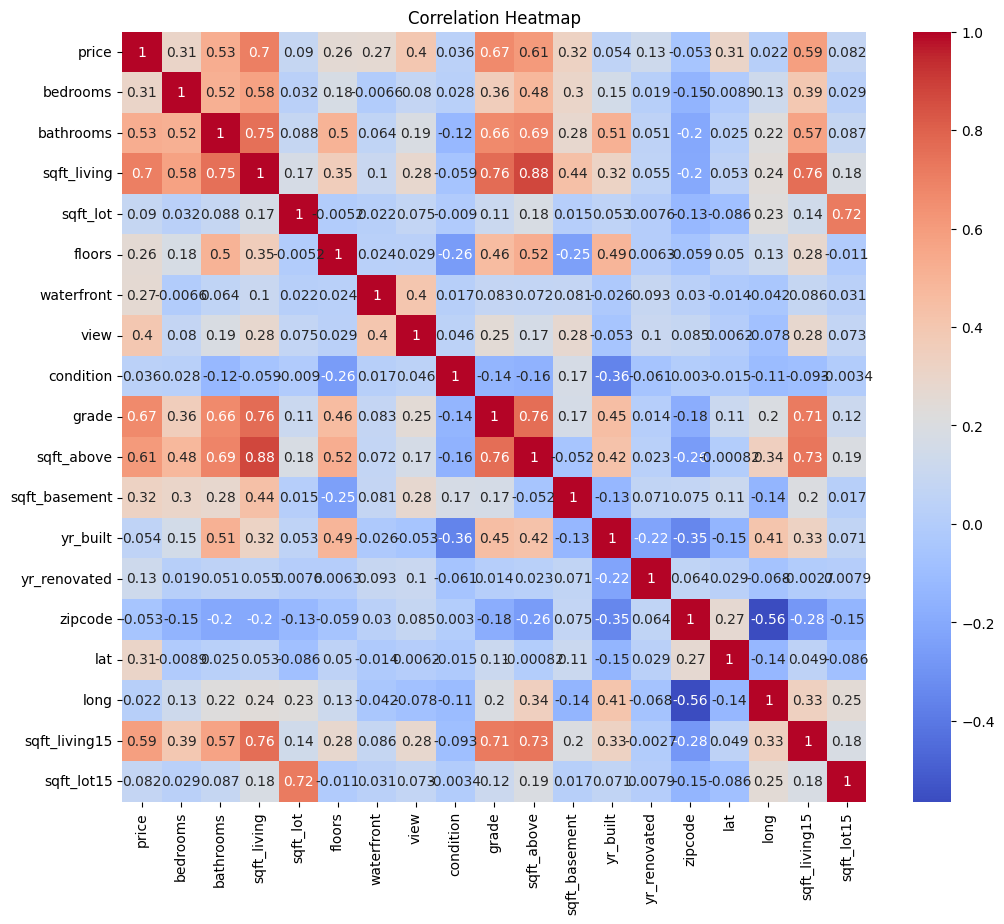

In [28]:
df_for_corr = df.drop(['id', 'date'], axis=1) # 특정 열(문자형/날짜형 등) 제거

plt.figure(figsize=(12, 10))
sns.heatmap(df_for_corr.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

**📌 4. 데이터 전처리**

🎯 ① 입력(X)과 타깃(y) 분리

In [29]:
# 일반적으로 'price'가 예측해야 할 타깃(집값)입니다.
X = df.drop('price', axis=1)
y = df['price']

🎯 ② 데이터 정규화 (스케일링)

In [30]:
# 예: 'id', 'date' 등을 drop하고 나머지 수치형만 사용
df_numeric = df.drop(['id', 'date'], axis=1)  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)


🎯 ③ 학습 / 테스트 데이터 분리

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, 
    y, 
    test_size=0.2, 
    random_state=42
)

print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_test:", X_test.shape, "y_test:", y_test.shape)

X_train: (17290, 19) y_train: (17290,)
X_test: (4323, 19) y_test: (4323,)


**📌 5. 모델 구성 및 학습**

🧠 모델 정의

In [32]:
model = Sequential()
# 예시로 입력층(특징 개수)을 자동 설정하기 위해 X_train.shape[1] 사용
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # 회귀 → 출력 노드 1개, 보통 activation='linear'

# ⚙️ 컴파일 (회귀 → mse/mae 등 사용)
model.compile(optimizer='adam', 
              loss='mse', 
              metrics=['mae', 'mse'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1280      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 7,553
Trainable params: 7,553
Non-trainable params: 0
_________________________________________________________________


📈 학습

In [33]:
N_EPOCHS = 20
history = model.fit(
    X_train, y_train, 
    epochs=N_EPOCHS, 
    batch_size=32, 
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/20
541/541 [==============================] - 1s 730us/step - loss: 356224598016.0000 - mae: 489922.0312 - mse: 356224598016.0000 - val_loss: 151974232064.0000 - val_mae: 310560.5000 - val_mse: 151974232064.0000
Epoch 2/20
541/541 [==============================] - 0s 537us/step - loss: 69106302976.0000 - mae: 204015.1250 - mse: 69106302976.0000 - val_loss: 55061377024.0000 - val_mae: 177317.7969 - val_mse: 55061377024.0000
Epoch 3/20
541/541 [==============================] - 0s 523us/step - loss: 40176742400.0000 - mae: 154831.6719 - mse: 40176742400.0000 - val_loss: 36645351424.0000 - val_mae: 143398.2031 - val_mse: 36645351424.0000
Epoch 4/20
541/541 [==============================] - 0s 537us/step - loss: 25795399680.0000 - mae: 122142.9375 - mse: 25795399680.0000 - val_loss: 22224150528.0000 - val_mae: 108879.8438 - val_mse: 22224150528.0000
Epoch 5/20
541/541 [==============================] - 0s 542us/step - loss: 15021207552.0000 - mae: 90867.2812 - mse: 15021207552.00

**📌 6. 학습 결과 시각화**

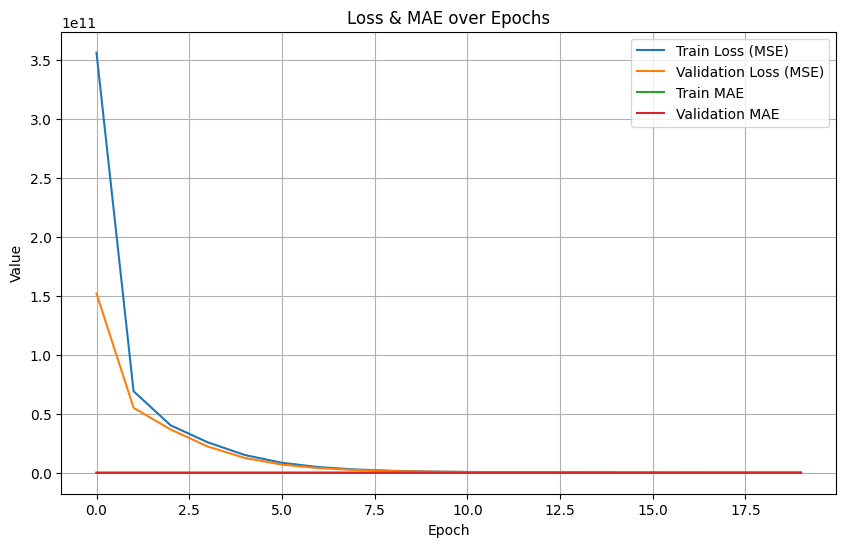

In [34]:
plt.figure(figsize=(10, 6))

# 회귀 모델에서는 'loss'와 'val_loss'가 중요. 
# metrics에 'mae', 'mse'를 넣었으므로 'mae', 'val_mae'도 확인 가능.
plt.plot(history.history['loss'], label='Train Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')

plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.title("Loss & MAE over Epochs")
plt.grid()
plt.show()

**📌 7. 모델 평가**

In [35]:
loss, mae, mse = model.evaluate(X_test, y_test)
print(f"Test MSE: {mse:.4f}")
print(f"Test MAE: {mae:.4f}")

136/136 [==============================] - 0s 341us/step - loss: 39047148.0000 - mae: 3543.1104 - mse: 39047148.0000
Test MSE: 39047148.0000
Test MAE: 3543.1104


R² 스코어(결정계수)로 모델 성능을 확인

In [37]:
# 예측
y_pred = model.predict(X_test)

# R² 계산
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2:.4f}")

136/136 [==============================] - 0s 330us/step
R2 Score: 0.9997


**📌 8. 예측 결과 시각화**

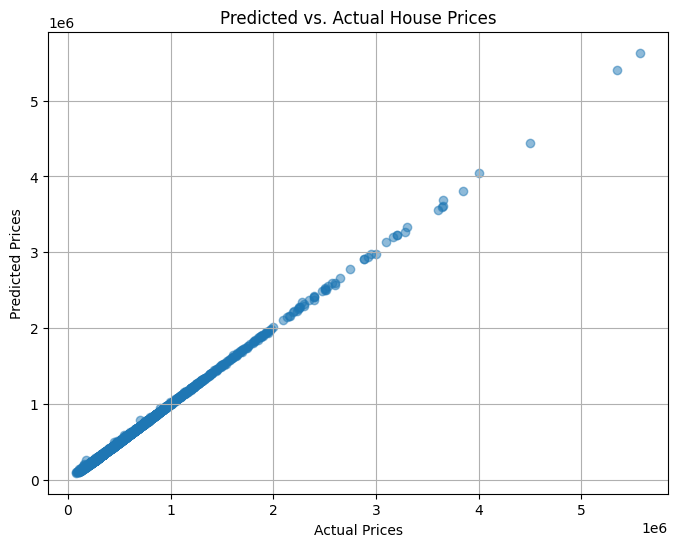

In [40]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title("Predicted vs. Actual House Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.grid()
plt.show()